# 函数拟合

## 问题描述：

​	理论和实验证明，一个两层的ReLU网络可以模拟任何函数。请自行定义一个函数, 并使用基于ReLU的神经网络来拟合此函数。

## 代码

Epoch [100/2000], Train Loss: 0.0584, Test Loss: 0.0679
Epoch [200/2000], Train Loss: 0.0472, Test Loss: 0.0623
Epoch [300/2000], Train Loss: 0.0529, Test Loss: 0.0643
Epoch [400/2000], Train Loss: 0.0497, Test Loss: 0.0858
Epoch [500/2000], Train Loss: 0.0962, Test Loss: 0.1187
Epoch [600/2000], Train Loss: 0.0226, Test Loss: 0.0419
Epoch [700/2000], Train Loss: 0.0104, Test Loss: 0.0310
Epoch [800/2000], Train Loss: 0.0036, Test Loss: 0.0053
Epoch [900/2000], Train Loss: 0.0023, Test Loss: 0.0039
Epoch [1000/2000], Train Loss: 0.0617, Test Loss: 0.0320
Epoch [1100/2000], Train Loss: 0.0008, Test Loss: 0.0017
Epoch [1200/2000], Train Loss: 0.0023, Test Loss: 0.0031
Epoch [1300/2000], Train Loss: 0.0403, Test Loss: 0.0462
Epoch [1400/2000], Train Loss: 0.0007, Test Loss: 0.0019
Epoch [1500/2000], Train Loss: 0.0007, Test Loss: 0.0013
Epoch [1600/2000], Train Loss: 0.0005, Test Loss: 0.0008
Epoch [1700/2000], Train Loss: 0.0017, Test Loss: 0.0033
Epoch [1800/2000], Train Loss: 0.0022, T

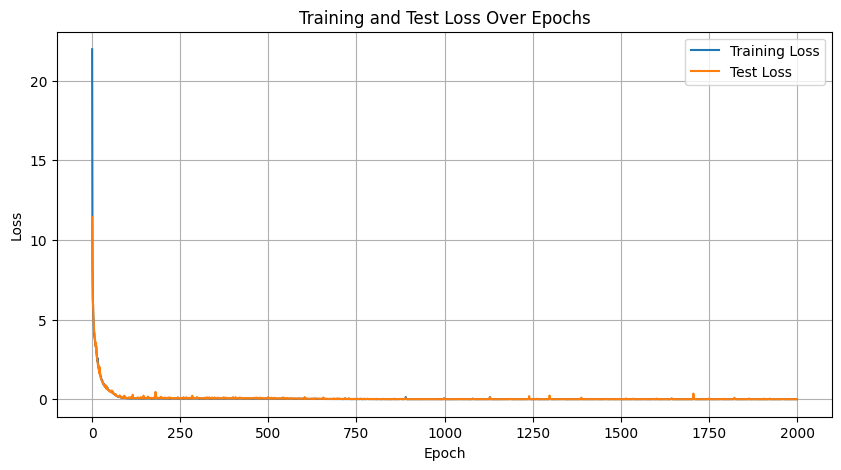

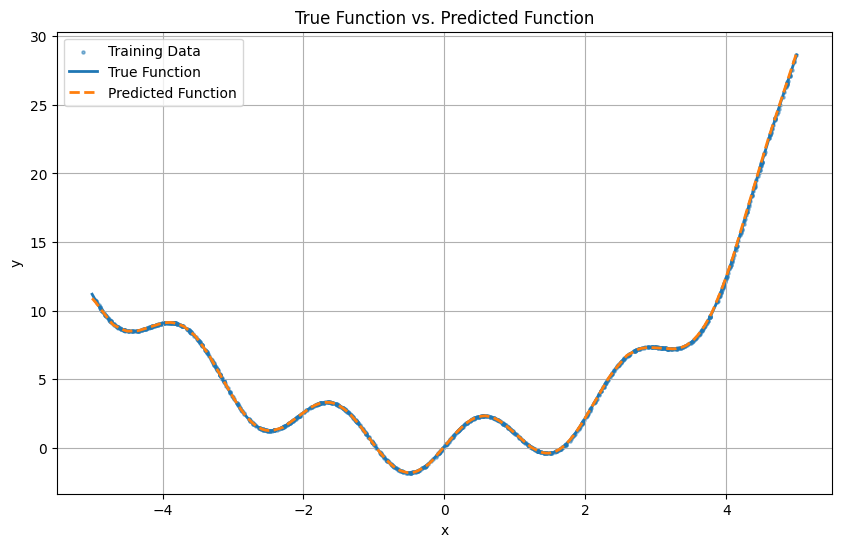

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 定义目标函数
def target_func(x):
    return 2 * np.sin(3 * x) + 0.5 * x**2 + 0.1 * np.exp(x)

# 生成训练和测试数据
np.random.seed(42)
x_train = np.random.uniform(-5, 5, (1000, 1))
y_train = target_func(x_train)
x_test = np.linspace(-5, 5, 200).reshape(-1, 1)
y_test = target_func(x_test)

# 转换为PyTorch张量
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 定义神经网络模型
class ReLUNet(nn.Module):
    def __init__(self, hidden_size=200):
        super(ReLUNet, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = ReLUNet()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 创建数据加载器
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# 训练模型
num_epochs = 2000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # 测试损失
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
        test_losses.append(test_loss)
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}')

# 绘制训练和测试损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 绘制真实函数与预测结果对比
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=5, label='Training Data', alpha=0.5)
plt.plot(x_test, y_test, label='True Function', linewidth=2)
plt.plot(x_test, y_pred, '--', label='Predicted Function', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs. Predicted Function')
plt.legend()
plt.grid(True)
plt.show()

## 报告

[Report](./function_fitting.pdf)